In [280]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [281]:
data = pd.read_excel(r"C:\Users\kriti\kriti python\clustering project\SG_2010.xlsx")

In [282]:
data.head()

,seas_id,season,player_id,player,birth_year,pos,age,experience,lg,tm,g,gs,mp,fg,fga,fg_percent,x3p,x3pa,x3p_percent,x2p,x2pa,x2p_percent,e_fg_percent,ft,fta,ft_percent,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,22178,2010,2967,Allen Iverson,NaN,SG,34,14,NBA,PHI,25,24,798,121,290,0.417,8,24,0.333,113,266,0.425,0.431,98,119,0.824,15,60,75,102,18,2,57,43,348
1,22179,2010,3858,Alonzo Gee,NaN,SG,22,1,NBA,WAS,11,2,182,28,59,0.475,7,9,0.778,21,50,0.420,0.534,18,29,0.621,15,18,33,7,7,1,10,13,81
2,22197,2010,3796,Anthony Morrow,NaN,SG,24,2,NBA,GSW,69,37,2018,329,703,0.468,140,307,0.456,189,396,0.477,0.568,101,114,0.886,61,198,259,104,65,16,84,158,899
3,22198,2010,3038,Anthony Parker,NaN,SG,34,7,NBA,CLE,81,81,2289,206,475,0.434,108,261,0.414,98,214,0.458,0.547,75,95,0.789,30,201,231,157,63,18,71,151,595
4,22206,2010,3737,Arron Afflalo,NaN,SG,24,3,NBA,DEN,82,75,2221,272,585,0.465,108,249,0.434,164,336,0.488,0.557,72,98,0.735,59,193,252,138,46,30,74,225,724


In [283]:
pd.set_option('display.max_columns', None)

In [284]:
print(data)

     seas_id  season  player_id            player  birth_year pos  age  \
0      22178    2010       2967     Allen Iverson         NaN  SG   34   
1      22179    2010       3858        Alonzo Gee         NaN  SG   22   
2      22197    2010       3796    Anthony Morrow         NaN  SG   24   
3      22198    2010       3038    Anthony Parker         NaN  SG   34   
4      22206    2010       3737     Arron Afflalo         NaN  SG   24   
..       ...     ...        ...               ...         ...  ..  ...   
108    22723    2010       3913   Wayne Ellington         NaN  SG   22   
109    22724    2010       3914   Wesley Matthews         NaN  SG   23   
110    22727    2010       3492      Willie Green         NaN  SG   28   
111    22728    2010       3793   Wilson Chandler         NaN  SG   22   
112    22729    2010       3730  Yakhouba Diawara         NaN  SG   27   

     experience   lg   tm   g  gs    mp   fg  fga  fg_percent  x3p  x3pa  \
0            14  NBA  PHI  25  24  

In [285]:
pg_columns_to_keep =  ['pts', 'x3p', 'stl', 'orb', 'ast', 'trb', 'blk', 'gs', 'e_fg_percent', 'fg_percent', 'x3p_percent']


# Keep only the specified columns for a point guard
filtered_df_pg = data[pg_columns_to_keep]

# Display the resulting DataFrame
print(filtered_df_pg)

     pts  x3p  stl  orb  ast  trb  blk  gs  e_fg_percent  fg_percent  \
0    348    8   18   15  102   75    2  24         0.431       0.417   
1     81    7    7   15    7   33    1   2         0.534       0.475   
2    899  140   65   61  104  259   16  37         0.568       0.468   
3    595  108   63   30  157  231   18  81         0.547       0.434   
4    724  108   46   59  138  252   30  75         0.557       0.465   
..   ...  ...  ...  ...  ...  ...  ...  ..           ...         ...   
108  505   64   20   33   74  159    5   1         0.496       0.424   
109  769   63   64   50  124  191   15  48         0.539       0.483   
110  638   47   32   20  152  129   11  18         0.500       0.457   
111  993   40   46   93  138  348   49  64         0.502       0.479   
112    5    1    1    1    3    4    0   2         0.250       0.200   

     x3p_percent  
0          0.333  
1          0.778  
2          0.456  
3          0.414  
4          0.434  
..           ...  
10

In [286]:

filtered_df_pg_placeholder = filtered_df_pg.fillna(-1)


C:\Users\kriti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kriti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\kriti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kriti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

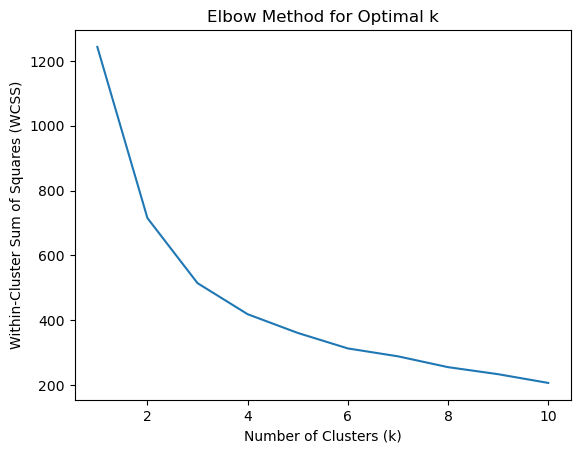

In [287]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Assuming 'filtered_df_pg_placeholder' is your preprocessed DataFrame

# Impute any remaining missing values (if any)
imputer = SimpleImputer(strategy='mean')
filtered_df_pg_imputed = pd.DataFrame(imputer.fit_transform(filtered_df_pg_placeholder), columns=filtered_df_pg_placeholder.columns)

# Standardize the data
scaler = StandardScaler()
filtered_df_pg_standardized = scaler.fit_transform(filtered_df_pg_imputed)

# Use the Elbow Method to determine the optimal number of clusters (k)
wcss = []  # Within-Cluster Sum of Squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(filtered_df_pg_standardized)
    wcss.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()


In [288]:
optimal_k = 4

# Perform k-means clustering
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(filtered_df_pg_standardized)

# Add the cluster labels to your DataFrame
filtered_df_pg_placeholder['Cluster'] = cluster_labels

# Display the resulting DataFrame with cluster labels
print(filtered_df_pg_placeholder)

     pts  x3p  stl  orb  ast  trb  blk  gs  e_fg_percent  fg_percent  \
0    348    8   18   15  102   75    2  24         0.431       0.417   
1     81    7    7   15    7   33    1   2         0.534       0.475   
2    899  140   65   61  104  259   16  37         0.568       0.468   
3    595  108   63   30  157  231   18  81         0.547       0.434   
4    724  108   46   59  138  252   30  75         0.557       0.465   
..   ...  ...  ...  ...  ...  ...  ...  ..           ...         ...   
108  505   64   20   33   74  159    5   1         0.496       0.424   
109  769   63   64   50  124  191   15  48         0.539       0.483   
110  638   47   32   20  152  129   11  18         0.500       0.457   
111  993   40   46   93  138  348   49  64         0.502       0.479   
112    5    1    1    1    3    4    0   2         0.250       0.200   

     x3p_percent  Cluster  
0          0.333        3  
1          0.778        3  
2          0.456        1  
3          0.414       

C:\Users\kriti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kriti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


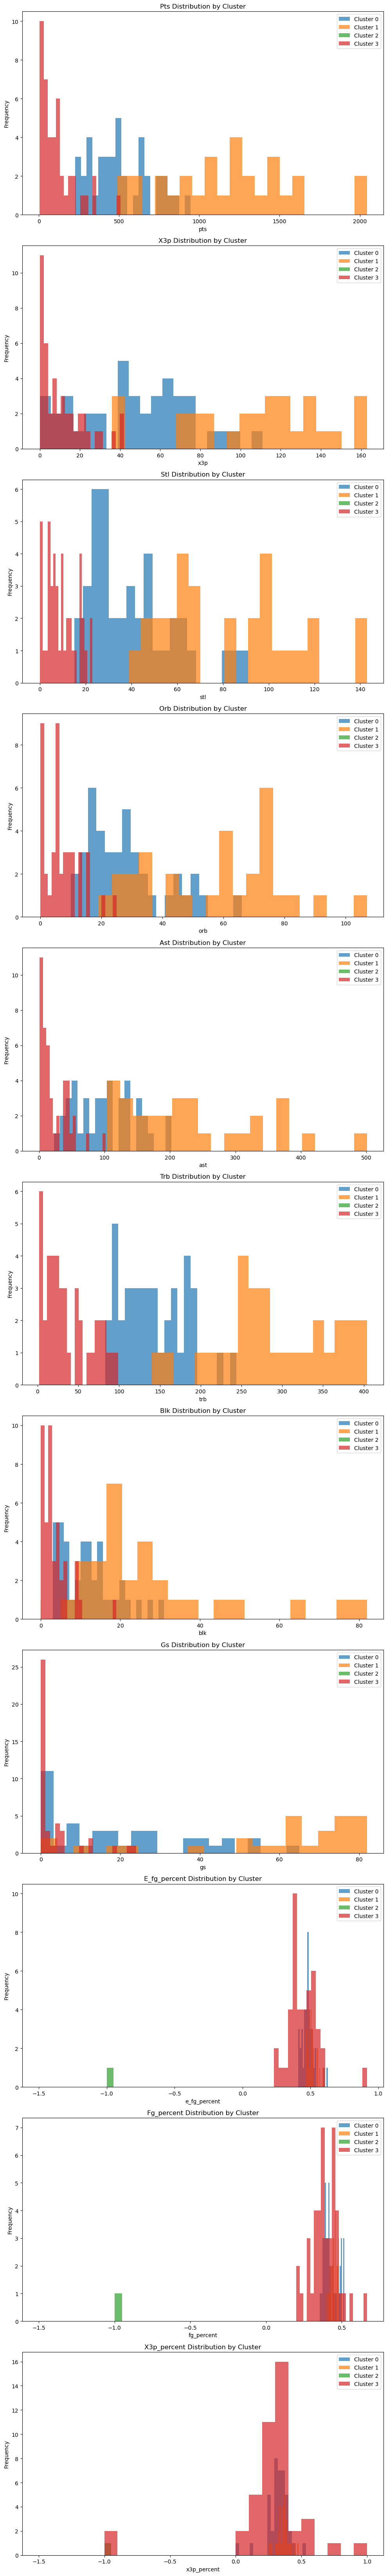

In [289]:
import matplotlib.pyplot as plt

# Features to plot
features_to_plot = ['pts', 'x3p', 'stl', 'orb', 'ast', 'trb', 'blk', 'gs', 'e_fg_percent', 'fg_percent', 'x3p_percent']

# Set up subplots
fig, axes = plt.subplots(nrows=len(features_to_plot), ncols=1, figsize=(10, 6 * len(features_to_plot)))

# Plot each feature for each cluster
for i, feature in enumerate(features_to_plot):
    for cluster in range(optimal_k):
        # Select data for the current cluster
        cluster_data = filtered_df_pg_placeholder[filtered_df_pg_placeholder['Cluster'] == cluster]
        
        # Plot the feature for the current cluster
        axes[i].hist(cluster_data[feature], bins=20, alpha=0.7, label=f'Cluster {cluster}')

    # Set labels and title for each subplot
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
    axes[i].legend()
    axes[i].set_title(f'{feature.capitalize()} Distribution by Cluster')

# Adjust layout
plt.tight_layout()
plt.show()
